In [408]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

In [409]:
train_df = pd.read_csv("./databases/train.csv")
test_df =  pd.read_csv("./databases/test.csv")

In [410]:
train_df 

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,1/1/2018 0:15,2.95,0.0,0.00,73.21,100.0,900,Weekday,Monday,Light_Load,3.17
1,2,1/1/2018 0:30,4.46,0.0,0.00,66.77,100.0,1800,Weekday,Monday,Light_Load,4.00
2,3,1/1/2018 0:45,3.28,0.0,0.00,70.28,100.0,2700,Weekday,Monday,Light_Load,3.24
3,4,1/1/2018 1:00,3.56,0.0,0.00,68.09,100.0,3600,Weekday,Monday,Light_Load,3.31
4,5,1/1/2018 1:15,4.50,0.0,0.00,64.72,100.0,4500,Weekday,Monday,Light_Load,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
27994,27995,19/10/2018 14:45,32.62,0.0,0.02,85.75,100.0,53100,Weekday,Friday,Maximum_Load,54.36
27995,27996,19/10/2018 15:00,35.46,0.0,0.03,84.76,100.0,54000,Weekday,Friday,Maximum_Load,56.63
27996,27997,19/10/2018 15:15,30.92,0.0,0.03,89.63,100.0,54900,Weekday,Friday,Maximum_Load,62.50
27997,27998,19/10/2018 15:30,58.18,0.0,0.04,83.89,100.0,55800,Weekday,Friday,Maximum_Load,89.68


In [411]:
test_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,28000,19/10/2018 16:00,63.68,0.00,0.05,84.19,100.00,57600,Weekday,Friday,Maximum_Load
1,28001,19/10/2018 16:15,54.18,0.00,0.04,85.28,100.00,58500,Weekday,Friday,Maximum_Load
2,28002,19/10/2018 16:30,55.04,0.00,0.04,85.28,100.00,59400,Weekday,Friday,Maximum_Load
3,28003,19/10/2018 16:45,36.40,0.00,0.03,84.13,100.00,60300,Weekday,Friday,Maximum_Load
4,28004,19/10/2018 17:00,35.17,0.00,0.03,85.08,100.00,61200,Weekday,Friday,Maximum_Load
...,...,...,...,...,...,...,...,...,...,...,...
7036,35036,31/12/2018 23:00,4.86,0.00,0.00,62.10,100.00,82800,Weekday,Monday,Light_Load
7037,35037,31/12/2018 23:15,3.74,0.00,0.00,70.71,100.00,83700,Weekday,Monday,Light_Load
7038,35038,31/12/2018 23:30,3.17,0.07,0.00,76.62,99.98,84600,Weekday,Monday,Light_Load
7039,35039,31/12/2018 23:45,3.06,0.11,0.00,77.72,99.96,85500,Weekday,Monday,Light_Load


In [412]:
train_df_null = train_df.isnull()
print(train_df_null.sum())

Id                                         0
date                                       0
Lagging_Current_Reactive.Power_kVarh       0
Leading_Current_Reactive_Power_kVarh     119
CO2(tCO2)                                  0
Lagging_Current_Power_Factor               0
Leading_Current_Power_Factor              76
NSM                                        0
WeekStatus                              1774
Day_of_week                             1774
Load_Type                                  0
Usage_kWh                                  0
dtype: int64


In [413]:
test_df_null = test_df.isnull()
print(test_df_null.sum())

Id                                        0
date                                      0
Lagging_Current_Reactive.Power_kVarh      0
Leading_Current_Reactive_Power_kVarh      0
CO2(tCO2)                                 0
Lagging_Current_Power_Factor              0
Leading_Current_Power_Factor              0
NSM                                       0
WeekStatus                              692
Day_of_week                             692
Load_Type                                 0
dtype: int64


In [414]:
imputer_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
train_df['Leading_Current_Reactive_Power_kVarh'] = imputer_mean.fit_transform(train_df[['Leading_Current_Reactive_Power_kVarh']])
train_df['Leading_Current_Power_Factor'] = imputer_mean.fit_transform(train_df[['Leading_Current_Power_Factor']])

In [415]:
def weekStatus(day):
    if day in ['Saturday','Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'
    
train_df ['WeekStatus'] = train_df['Day_of_week'].apply(weekStatus)   
test_df ['WeekStatus'] = test_df['Day_of_week'].apply(weekStatus)   

In [416]:
train_df['date'] = pd.to_datetime(train_df['date'], format='%d/%m/%Y %H:%M')
test_df['date'] = pd.to_datetime(test_df['date'], format='%d/%m/%Y %H:%M')

train_df['Day_of_week'] = train_df['date'].dt.day_name()
test_df['Day_of_week'] = test_df['date'].dt.day_name()

In [417]:
train_df_null = train_df.isnull()
print(train_df_null.sum())

Id                                      0
date                                    0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
Usage_kWh                               0
dtype: int64


In [418]:
test_df_null = test_df.isnull()
print(test_df_null.sum())

Id                                      0
date                                    0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


In [419]:
train_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,2018-01-01 00:15:00,2.95,0.0,0.00,73.21,100.0,900,Weekday,Monday,Light_Load,3.17
1,2,2018-01-01 00:30:00,4.46,0.0,0.00,66.77,100.0,1800,Weekday,Monday,Light_Load,4.00
2,3,2018-01-01 00:45:00,3.28,0.0,0.00,70.28,100.0,2700,Weekday,Monday,Light_Load,3.24
3,4,2018-01-01 01:00:00,3.56,0.0,0.00,68.09,100.0,3600,Weekday,Monday,Light_Load,3.31
4,5,2018-01-01 01:15:00,4.50,0.0,0.00,64.72,100.0,4500,Weekday,Monday,Light_Load,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
27994,27995,2018-10-19 14:45:00,32.62,0.0,0.02,85.75,100.0,53100,Weekday,Friday,Maximum_Load,54.36
27995,27996,2018-10-19 15:00:00,35.46,0.0,0.03,84.76,100.0,54000,Weekday,Friday,Maximum_Load,56.63
27996,27997,2018-10-19 15:15:00,30.92,0.0,0.03,89.63,100.0,54900,Weekday,Friday,Maximum_Load,62.50
27997,27998,2018-10-19 15:30:00,58.18,0.0,0.04,83.89,100.0,55800,Weekday,Friday,Maximum_Load,89.68


In [420]:
test_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,28000,2018-10-19 16:00:00,63.68,0.00,0.05,84.19,100.00,57600,Weekday,Friday,Maximum_Load
1,28001,2018-10-19 16:15:00,54.18,0.00,0.04,85.28,100.00,58500,Weekday,Friday,Maximum_Load
2,28002,2018-10-19 16:30:00,55.04,0.00,0.04,85.28,100.00,59400,Weekday,Friday,Maximum_Load
3,28003,2018-10-19 16:45:00,36.40,0.00,0.03,84.13,100.00,60300,Weekday,Friday,Maximum_Load
4,28004,2018-10-19 17:00:00,35.17,0.00,0.03,85.08,100.00,61200,Weekday,Friday,Maximum_Load
...,...,...,...,...,...,...,...,...,...,...,...
7036,35036,2018-12-31 23:00:00,4.86,0.00,0.00,62.10,100.00,82800,Weekday,Monday,Light_Load
7037,35037,2018-12-31 23:15:00,3.74,0.00,0.00,70.71,100.00,83700,Weekday,Monday,Light_Load
7038,35038,2018-12-31 23:30:00,3.17,0.07,0.00,76.62,99.98,84600,Weekday,Monday,Light_Load
7039,35039,2018-12-31 23:45:00,3.06,0.11,0.00,77.72,99.96,85500,Weekday,Monday,Light_Load


In [421]:
categorical_features = ['WeekStatus', 'Day_of_week', 'Load_Type']
label_encoder = LabelEncoder()
train_df_label_encoder = train_df.copy()
test_df_label_encoder = test_df.copy()

for feature in categorical_features:
    train_df_label_encoder[feature] = label_encoder.fit_transform(train_df_label_encoder[feature])
    test_df_label_encoder[feature] = label_encoder.transform(test_df_label_encoder[feature])

In [422]:
train_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,2018-01-01 00:15:00,2.95,0.0,0.00,73.21,100.0,900,Weekday,Monday,Light_Load,3.17
1,2,2018-01-01 00:30:00,4.46,0.0,0.00,66.77,100.0,1800,Weekday,Monday,Light_Load,4.00
2,3,2018-01-01 00:45:00,3.28,0.0,0.00,70.28,100.0,2700,Weekday,Monday,Light_Load,3.24
3,4,2018-01-01 01:00:00,3.56,0.0,0.00,68.09,100.0,3600,Weekday,Monday,Light_Load,3.31
4,5,2018-01-01 01:15:00,4.50,0.0,0.00,64.72,100.0,4500,Weekday,Monday,Light_Load,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
27994,27995,2018-10-19 14:45:00,32.62,0.0,0.02,85.75,100.0,53100,Weekday,Friday,Maximum_Load,54.36
27995,27996,2018-10-19 15:00:00,35.46,0.0,0.03,84.76,100.0,54000,Weekday,Friday,Maximum_Load,56.63
27996,27997,2018-10-19 15:15:00,30.92,0.0,0.03,89.63,100.0,54900,Weekday,Friday,Maximum_Load,62.50
27997,27998,2018-10-19 15:30:00,58.18,0.0,0.04,83.89,100.0,55800,Weekday,Friday,Maximum_Load,89.68


In [423]:
test_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,28000,2018-10-19 16:00:00,63.68,0.00,0.05,84.19,100.00,57600,Weekday,Friday,Maximum_Load
1,28001,2018-10-19 16:15:00,54.18,0.00,0.04,85.28,100.00,58500,Weekday,Friday,Maximum_Load
2,28002,2018-10-19 16:30:00,55.04,0.00,0.04,85.28,100.00,59400,Weekday,Friday,Maximum_Load
3,28003,2018-10-19 16:45:00,36.40,0.00,0.03,84.13,100.00,60300,Weekday,Friday,Maximum_Load
4,28004,2018-10-19 17:00:00,35.17,0.00,0.03,85.08,100.00,61200,Weekday,Friday,Maximum_Load
...,...,...,...,...,...,...,...,...,...,...,...
7036,35036,2018-12-31 23:00:00,4.86,0.00,0.00,62.10,100.00,82800,Weekday,Monday,Light_Load
7037,35037,2018-12-31 23:15:00,3.74,0.00,0.00,70.71,100.00,83700,Weekday,Monday,Light_Load
7038,35038,2018-12-31 23:30:00,3.17,0.07,0.00,76.62,99.98,84600,Weekday,Monday,Light_Load
7039,35039,2018-12-31 23:45:00,3.06,0.11,0.00,77.72,99.96,85500,Weekday,Monday,Light_Load


In [424]:
train_df_label_encoder

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,2018-01-01 00:15:00,2.95,0.0,0.00,73.21,100.0,900,0,1,0,3.17
1,2,2018-01-01 00:30:00,4.46,0.0,0.00,66.77,100.0,1800,0,1,0,4.00
2,3,2018-01-01 00:45:00,3.28,0.0,0.00,70.28,100.0,2700,0,1,0,3.24
3,4,2018-01-01 01:00:00,3.56,0.0,0.00,68.09,100.0,3600,0,1,0,3.31
4,5,2018-01-01 01:15:00,4.50,0.0,0.00,64.72,100.0,4500,0,1,0,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
27994,27995,2018-10-19 14:45:00,32.62,0.0,0.02,85.75,100.0,53100,0,0,1,54.36
27995,27996,2018-10-19 15:00:00,35.46,0.0,0.03,84.76,100.0,54000,0,0,1,56.63
27996,27997,2018-10-19 15:15:00,30.92,0.0,0.03,89.63,100.0,54900,0,0,1,62.50
27997,27998,2018-10-19 15:30:00,58.18,0.0,0.04,83.89,100.0,55800,0,0,1,89.68


In [425]:
test_df_label_encoder

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,28000,2018-10-19 16:00:00,63.68,0.00,0.05,84.19,100.00,57600,0,0,1
1,28001,2018-10-19 16:15:00,54.18,0.00,0.04,85.28,100.00,58500,0,0,1
2,28002,2018-10-19 16:30:00,55.04,0.00,0.04,85.28,100.00,59400,0,0,1
3,28003,2018-10-19 16:45:00,36.40,0.00,0.03,84.13,100.00,60300,0,0,1
4,28004,2018-10-19 17:00:00,35.17,0.00,0.03,85.08,100.00,61200,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7036,35036,2018-12-31 23:00:00,4.86,0.00,0.00,62.10,100.00,82800,0,1,0
7037,35037,2018-12-31 23:15:00,3.74,0.00,0.00,70.71,100.00,83700,0,1,0
7038,35038,2018-12-31 23:30:00,3.17,0.07,0.00,76.62,99.98,84600,0,1,0
7039,35039,2018-12-31 23:45:00,3.06,0.11,0.00,77.72,99.96,85500,0,1,0


In [426]:
correlation_matrix = train_df.corr(numeric_only=True)
print(correlation_matrix)

                                            Id  \
Id                                    1.000000   
Lagging_Current_Reactive.Power_kVarh -0.026993   
Leading_Current_Reactive_Power_kVarh -0.059080   
CO2(tCO2)                            -0.122329   
Lagging_Current_Power_Factor         -0.216354   
Leading_Current_Power_Factor         -0.027859   
NSM                                   0.001038   
Usage_kWh                            -0.134914   

                                      Lagging_Current_Reactive.Power_kVarh  \
Id                                                               -0.026993   
Lagging_Current_Reactive.Power_kVarh                              1.000000   
Leading_Current_Reactive_Power_kVarh                             -0.402352   
CO2(tCO2)                                                         0.877609   
Lagging_Current_Power_Factor                                      0.156744   
Leading_Current_Power_Factor                                      0.405831   
NSM

In [427]:
train_df_label_encoder['month'] = train_df_label_encoder['date'].dt.month
train_df_label_encoder['day'] = train_df_label_encoder['date'].dt.day
train_df_label_encoder['hour'] = train_df_label_encoder['date'].dt.hour
train_df_label_encoder['minute'] = train_df_label_encoder['date'].dt.minute
train_df_label_encoder = train_df_label_encoder.drop(columns=['date'])
train_df_label_encoder = train_df_label_encoder.drop(columns=['Id'])


test_df_label_encoder['month'] = test_df_label_encoder['date'].dt.month
test_df_label_encoder['day'] = test_df_label_encoder['date'].dt.day
test_df_label_encoder['hour'] = test_df_label_encoder['date'].dt.hour
test_df_label_encoder['minute'] = test_df_label_encoder['date'].dt.minute
test_df_label_encoder = test_df_label_encoder.drop(columns=['date'])
test_df_label_encoder = test_df_label_encoder.drop(columns=['Id'])


In [428]:
train_df_label_encoder

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh,month,day,hour,minute
0,2.95,0.0,0.00,73.21,100.0,900,0,1,0,3.17,1,1,0,15
1,4.46,0.0,0.00,66.77,100.0,1800,0,1,0,4.00,1,1,0,30
2,3.28,0.0,0.00,70.28,100.0,2700,0,1,0,3.24,1,1,0,45
3,3.56,0.0,0.00,68.09,100.0,3600,0,1,0,3.31,1,1,1,0
4,4.50,0.0,0.00,64.72,100.0,4500,0,1,0,3.82,1,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27994,32.62,0.0,0.02,85.75,100.0,53100,0,0,1,54.36,10,19,14,45
27995,35.46,0.0,0.03,84.76,100.0,54000,0,0,1,56.63,10,19,15,0
27996,30.92,0.0,0.03,89.63,100.0,54900,0,0,1,62.50,10,19,15,15
27997,58.18,0.0,0.04,83.89,100.0,55800,0,0,1,89.68,10,19,15,30


In [429]:
test_df_label_encoder

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,month,day,hour,minute
0,63.68,0.00,0.05,84.19,100.00,57600,0,0,1,10,19,16,0
1,54.18,0.00,0.04,85.28,100.00,58500,0,0,1,10,19,16,15
2,55.04,0.00,0.04,85.28,100.00,59400,0,0,1,10,19,16,30
3,36.40,0.00,0.03,84.13,100.00,60300,0,0,1,10,19,16,45
4,35.17,0.00,0.03,85.08,100.00,61200,0,0,1,10,19,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,4.86,0.00,0.00,62.10,100.00,82800,0,1,0,12,31,23,0
7037,3.74,0.00,0.00,70.71,100.00,83700,0,1,0,12,31,23,15
7038,3.17,0.07,0.00,76.62,99.98,84600,0,1,0,12,31,23,30
7039,3.06,0.11,0.00,77.72,99.96,85500,0,1,0,12,31,23,45


In [430]:
scaler = StandardScaler()
features_without_target = ['month', 'day','hour', 'minute','Lagging_Current_Reactive.Power_kVarh', 
                    'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 
                    'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Load_Type','Day_of_week'
                    ]
train_df_scaled = train_df_label_encoder.copy()
test_df_scaled = test_df_label_encoder.copy()

train_df_scaled[features_without_target] = pd.DataFrame(scaler.fit_transform(train_df_label_encoder[features_without_target]))
test_df_scaled[features_without_target] = pd.DataFrame(scaler.transform(test_df_label_encoder[features_without_target]))

In [431]:
train_df_scaled

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh,month,day,hour,minute
0,-0.624234,-0.518884,-0.720973,-0.346967,0.510866,-1.677242,-0.593644,-1.001225,-0.89182,3.17,-1.562057,-1.641156,-1.660539,-0.447268
1,-0.532550,-0.518884,-0.720973,-0.678975,0.510866,-1.641145,-0.593644,-1.001225,-0.89182,4.00,-1.562057,-1.641156,-1.660539,0.447172
2,-0.604197,-0.518884,-0.720973,-0.498020,0.510866,-1.605049,-0.593644,-1.001225,-0.89182,3.24,-1.562057,-1.641156,-1.660539,1.341612
3,-0.587196,-0.518884,-0.720973,-0.610924,0.510866,-1.568952,-0.593644,-1.001225,-0.89182,3.31,-1.562057,-1.641156,-1.516035,-1.341708
4,-0.530122,-0.518884,-0.720973,-0.784661,0.510866,-1.532855,-0.593644,-1.001225,-0.89182,3.82,-1.562057,-1.641156,-1.516035,-0.447268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27994,1.177262,-0.518884,0.502008,0.299520,0.510866,0.416372,-0.593644,-1.500100,0.27397,54.36,1.679490,0.423581,0.362523,1.341612
27995,1.349701,-0.518884,1.113499,0.248482,0.510866,0.452469,-0.593644,-1.500100,0.27397,56.63,1.679490,0.423581,0.507027,-1.341708
27996,1.074042,-0.518884,1.113499,0.499550,0.510866,0.488566,-0.593644,-1.500100,0.27397,62.50,1.679490,0.423581,0.507027,-0.447268
27997,2.729209,-0.518884,1.724990,0.203630,0.510866,0.524662,-0.593644,-1.500100,0.27397,89.68,1.679490,0.423581,0.507027,0.447172


In [432]:
test_df_scaled

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,month,day,hour,minute
0,3.063156,-0.518884,2.336480,0.219096,0.510866,0.596856,-0.593644,-1.500100,0.27397,1.679490,0.423581,0.651532,-1.341708
1,2.486338,-0.518884,1.724990,0.275290,0.510866,0.632953,-0.593644,-1.500100,0.27397,1.679490,0.423581,0.651532,-0.447268
2,2.538555,-0.518884,1.724990,0.275290,0.510866,0.669050,-0.593644,-1.500100,0.27397,1.679490,0.423581,0.651532,0.447172
3,1.406776,-0.518884,1.113499,0.216003,0.510866,0.705146,-0.593644,-1.500100,0.27397,1.679490,0.423581,0.651532,1.341612
4,1.332093,-0.518884,1.113499,0.264979,0.510866,0.741243,-0.593644,-1.500100,0.27397,1.679490,0.423581,0.796036,-1.341708
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,-0.508263,-0.518884,-0.720973,-0.919732,0.510866,1.607566,-0.593644,-1.001225,-0.89182,2.399833,1.800073,1.663063,-1.341708
7037,-0.576267,-0.518884,-0.720973,-0.475852,0.510866,1.643663,-0.593644,-1.001225,-0.89182,2.399833,1.800073,1.663063,-0.447268
7038,-0.610876,-0.509525,-0.720973,-0.171168,0.510208,1.679760,-0.593644,-1.001225,-0.89182,2.399833,1.800073,1.663063,0.447172
7039,-0.617555,-0.504177,-0.720973,-0.114458,0.509550,1.715857,-0.593644,-1.001225,-0.89182,2.399833,1.800073,1.663063,1.341612


In [433]:
# Calculate z-scores for each feature in the training dataset
z_scores_train = np.abs(stats.zscore(train_df_scaled[features_without_target]))
 
# Find outliers
train_outliers = np.where (z_scores_train >3) 

outlier_indices = np.unique(train_outliers[0])

train_df_scaled = train_df_scaled.drop(index=outlier_indices)



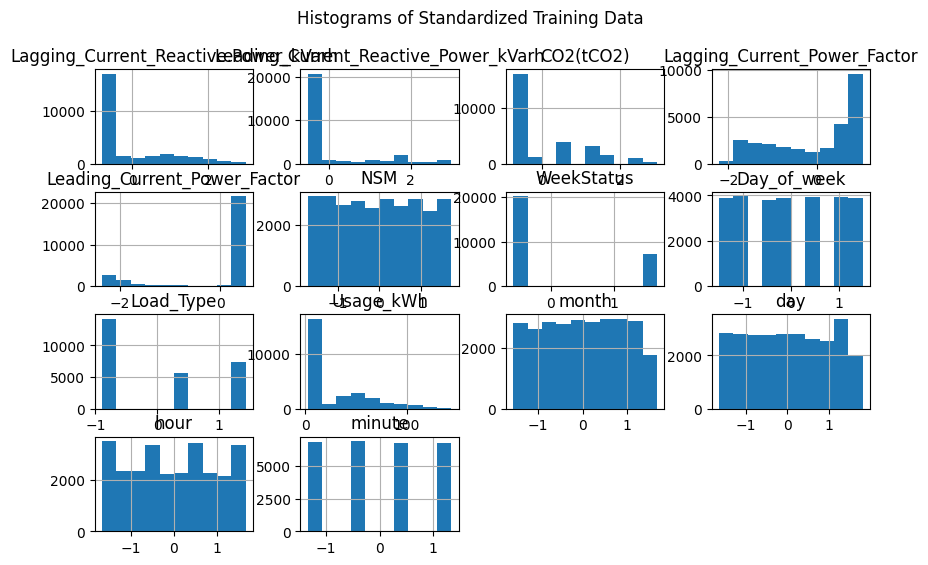

In [434]:
train_df_scaled.hist(figsize=(10, 6))
plt.suptitle('Histograms of Standardized Training Data')
plt.show()

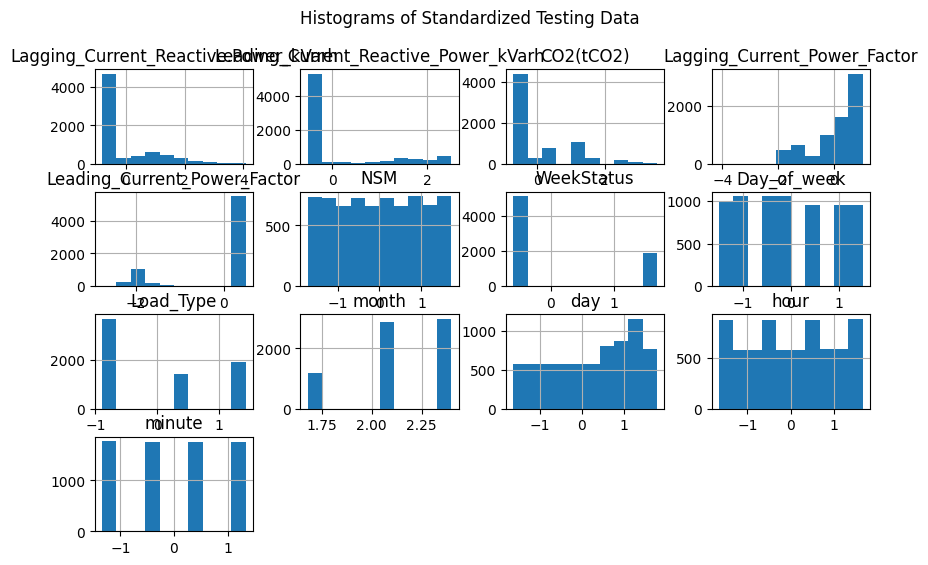

In [435]:
test_df_scaled.hist(figsize=(10, 6))
plt.suptitle('Histograms of Standardized Testing Data')
plt.show()

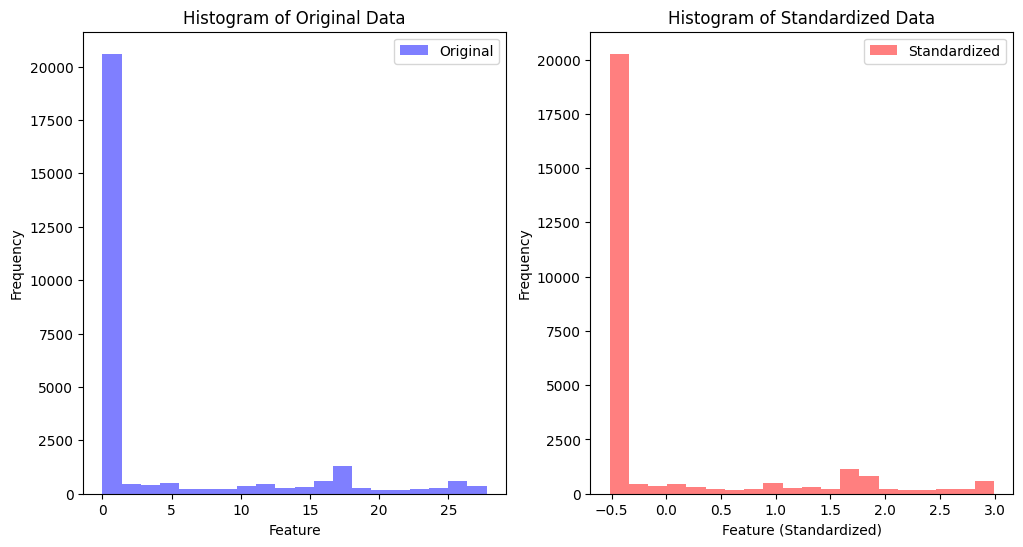

In [436]:
# Plot histograms of the original and standardized datasets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train_df['Leading_Current_Reactive_Power_kVarh'], bins=20, color='blue', alpha=0.5, label='Original')
plt.title('Histogram of Original Data')
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(train_df_scaled['Leading_Current_Reactive_Power_kVarh'], bins=20, color='red', alpha=0.5, label='Standardized')
plt.title('Histogram of Standardized Data')
plt.xlabel('Feature (Standardized)')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [437]:
# Define features and target

label = 'Usage_kWh'

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform KFold cross-validation
validation_rmse = []
for fold, (train_index, valid_index) in enumerate(kf.split(train_df_scaled), 1):
    print(f"Fold {fold}")
    
    # Split the data into training and validation sets for this fold
    X_train, X_valid = train_df_scaled.iloc[train_index][features_without_target], train_df_scaled.iloc[valid_index][features_without_target]
    y_train, y_valid = train_df_scaled.iloc[train_index][label], train_df_scaled.iloc[valid_index][label]

    # Initialize and train Linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred_valid = model.predict(X_valid)
    
    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
    print(f"Validation RMSE: {rmse}")
    validation_rmse.append(rmse)

    # Make predictions on the test set (assuming 'test_df_with_id' is your test dataset)
    test_predictions = model.predict(test_df_scaled[features_without_target])
    
    # Create a DataFrame for predictions with 'Id' column from 'test_df_with_id'
    submission_df = pd.DataFrame({'Id': test_df['Id'], 'Usage_kWh_Predicted': test_predictions})
    
    # Save the predictions to a CSV file with IDs
    submission_df.to_csv(f'predictions_fold_{fold}.csv', index=False)

# Optionally, you can calculate the mean validation RMSE
mean_validation_rmse = np.mean(validation_rmse)
print(f"Mean Validation RMSE: {mean_validation_rmse}")


Fold 1
Validation RMSE: 4.853241174841627
Fold 2
Validation RMSE: 4.445146745571279
Fold 3
Validation RMSE: 4.069304877207244
Fold 4
Validation RMSE: 4.545194991836574
Fold 5
Validation RMSE: 4.8924274678408946
Fold 6
Validation RMSE: 4.3527244576943716
Fold 7
Validation RMSE: 4.154963232146341
Fold 8
Validation RMSE: 5.141815092766537
Fold 9
Validation RMSE: 5.783957828651826
Fold 10
Validation RMSE: 5.006405738001436
Mean Validation RMSE: 4.724518160655814


In [438]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

label = 'Usage_kWh'

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform KFold cross-validation
validation_rmse = []
for fold, (train_index, valid_index) in enumerate(kf.split(train_df_scaled), 1):
    print(f"Fold {fold}")
    
    # Split the data into training and validation sets for this fold
    X_train, X_valid = train_df_scaled.iloc[train_index][features_without_target], train_df_scaled.iloc[valid_index][features_without_target]
    y_train, y_valid = train_df_scaled.iloc[train_index][label], train_df_scaled.iloc[valid_index][label]

    # Create a polynomial regression pipeline
    model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred_valid = model.predict(X_valid)
    
    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
    print(f"Validation RMSE: {rmse}")
    validation_rmse.append(rmse)

    # Make predictions on the test set (assuming 'test_df_with_id' is your test dataset)
    test_predictions = model.predict(test_df_scaled[features_without_target])
    
    # Create a DataFrame for predictions with 'Id' column from 'test_df_with_id'
    submission_df = pd.DataFrame({'Id': test_df['Id'], 'Usage_kWh_Predicted': test_predictions})
    
    # Save the predictions to a CSV file with IDs
    submission_df.to_csv(f'predictions_fold_{fold}.csv', index=False)

# Optionally, you can calculate the mean validation RMSE
mean_validation_rmse = np.mean(validation_rmse)
print(f"Mean Validation RMSE: {mean_validation_rmse}")


Fold 1
Validation RMSE: 2.0005785480848624
Fold 2
Validation RMSE: 2.156914345095412
Fold 3
Validation RMSE: 2.09989820419137
Fold 4
Validation RMSE: 2.1674941086135604
Fold 5
Validation RMSE: 1.8945697663663033
Fold 6
Validation RMSE: 2.0979389037868486
Fold 7
Validation RMSE: 1.9941139325467232
Fold 8
Validation RMSE: 2.132330645603599
Fold 9
Validation RMSE: 2.388666098770052
Fold 10
Validation RMSE: 1.9871772357749689
Mean Validation RMSE: 2.09196817888337
